# Entscheidungsbäume (Decision Trees)
## von Grund auf
<br>
<img width=500 height=300 class="imgright" src="Images/Tree.png" alt="restaurant" />

Bei Entscheidungsbäumen handelt es sich um ein Beispiel von Entscheidungs-basierten Klassifikationsverfahren.
Die Features eines Satzes von Samples werden in Abfragen überprüft und nach jeder Abfrage die Samples aufgeteilt in jeweils 2 Gruppen. Es handelt sich also somit um einen binären Baum, in dem die einzelnen Verzweigungen die Samples nach bestimmten Gesichtspunkten trennen, bis sich in den so entstehenden weiteren Knoten des Baumes nach Möglichkeit nur noch Samples jeweils einer der verschiedenen Klassen befinden. Dies wäre das Ziel der Klassifikation. Für unbekannte Testsamples könnten wir dann für die Klassifikation unseren Baum durchfahren und sehen, in welchen Endknoten (Blattknoten) die jeweiligen Samples enden.


Die aufzuteilenden Samples könnnen für die Features dabei sowohl kategorische Daten als auch kontinuierliche Daten enthalten also z.B. <br>für <b>Autos "Dieselmotor","4 Radantrieb"... kategorisch</b><br>
oder  z.B. für die <b>Körpergrösse 165cm, 176cm ... kontinuierlich.
    <br></b>
    Entsprechend heissen die Entscheidungsbäume dann ```kategorische Entscheidungsbäume``` oder ```kontinuierliche Entscheidungsbäume.```

Die Knoten eines Entscheidungsbaumes haben eine bestimmte Terminologie. Das Ziel ist, in den Blattknoten nur jeweils einen Label zu haben.
<br>
<img width=800   src="Images/Terminologie Entscheidungsbäume.png"  />

Nehmen wir als Beispiel Datenpunkte in einem zweidimensionalen Koordinatensystem mit den zwei Features x-Wert und y-Wert, die zu jeweils einer von zwei Kategorien gehören (rot und grün). Wir wollen hierfür einen kontinuierlichen Entscheidungsbaum erstellen. Zunächst unsere Daten.

X-Koordinate: -5.00  Y-Koordinate:  0.50  Label: 0
X-Koordinate: -4.50  Y-Koordinate: -1.50  Label: 0
X-Koordinate: -4.20  Y-Koordinate:  3.30  Label: 0
X-Koordinate: -3.00  Y-Koordinate: -2.00  Label: 0
X-Koordinate: -1.50  Y-Koordinate: -0.80  Label: 1
X-Koordinate: -1.20  Y-Koordinate:  1.30  Label: 1
X-Koordinate: -0.50  Y-Koordinate:  0.50  Label: 1
X-Koordinate:  0.00  Y-Koordinate:  0.00  Label: 1
X-Koordinate:  0.30  Y-Koordinate:  1.40  Label: 1
X-Koordinate:  0.50  Y-Koordinate: -0.50  Label: 1
X-Koordinate:  1.20  Y-Koordinate:  0.10  Label: 1
X-Koordinate:  2.00  Y-Koordinate:  1.70  Label: 1
X-Koordinate:  1.80  Y-Koordinate: -1.20  Label: 1
X-Koordinate:  0.20  Y-Koordinate:  3.20  Label: 0
X-Koordinate:  2.20  Y-Koordinate:  3.80  Label: 0
X-Koordinate:  4.00  Y-Koordinate:  0.20  Label: 0
X-Koordinate:  3.20  Y-Koordinate: -1.90  Label: 0
X-Koordinate:  5.00  Y-Koordinate: -1.00  Label: 0
0


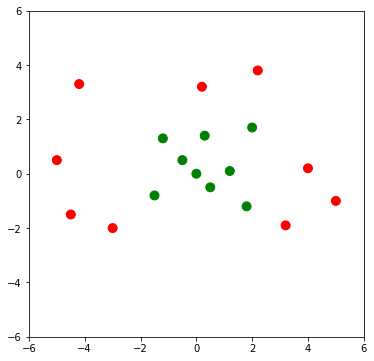

In [1]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
L,labels=[],[]
with open("Data/points.txt","r") as fh:
    for line in fh:
        x,y,label= line.rstrip().split(",")
        L.append([float(x),float(y)])
        labels.append (int(label))
        print(f"X-Koordinate: {float(x):5.2f}  Y-Koordinate: {float(y):5.2f}  Label: {int(label)}")
plt.figure(figsize=(6,6))
L=np.array(L)
plt.xlim(-6,6)
plt.ylim(-6,6)
colormap=np.array(["red","green"])
print(label)
plt.scatter(L[:,0],L[:,1],color=colormap[labels],s=80)

Diese Daten können wir nicht linear separieren.<br> Wie funktioniert nun unser Entscheidungsbaum?<br> Im Wurzelknoten haben wir alle 18 Punkte. Im ersten Knoten haben wir die Abfrage, ob der x-Wert grösser ist als -2. Falls dies der Fall ist, enthält der neue Knoten nur 4 rote Punkte, ist also rein und damit ein Blattknoten. Im anderen Fall haben wir noch 5 rote und 9 grüne Punkte im Knoten. Eine weitere Abfrage mit x<=3 spaltet diesen gemischten Knoten und es ergeben sich für den einen neuen Knoten bei "ja" 2 rote und 9 grüne Punkte. Im anderen Fall erhalten wir wieder einen Blattknoten mit 3 roten Punkten. Spalten wir unseren gemischten Knoten wieder auf mit y>=2 erhalten wir zwei Blattknoten mit 2 roten Punkte im Fall "ja" und 9 grünen Punkten bei "nein".<br>
<img width=600 height=600 class="imgright" src="Images/Entscheidungsbaum.png" alt="restaurant" />
<br> Damit haben wir alle Punkte kategorisiert. In unserem Plot zeigen wir unsere 3 Entscheidungstrennlinien.


0


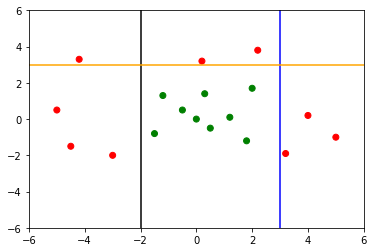

In [2]:
plt.xlim(-6,6)
plt.ylim(-6,6)
colormap=np.array(["red","green"])
print(label)
plt.scatter(L[:,0],L[:,1],color=colormap[labels])
plt.plot((-2,-2),(6,-6),c="black")
plt.plot((3,3),(6,-6),c="blue")
plt.plot((-6,6),(3,3),c="orange")

Bei komplexer Datensätzen kann es sein, dass wir nicht immer reine Blattknoten am Ende unseres Baumes erhalten. In diesem Fall machen wir eine Mehrheitsentscheidung und weisen den Punkten den Label zu, der am häufigsten im Knoten vorkommt. Warum machen wir dann nicht einfach weitere Abfragen und teilen die Knoten immer weiter auf bis wir reine Blattknoten erhalten? Dies würde im Extremfall dazu führen, dass jede Sample in einem eigenen Blattknoten liegt und würde einen extremen Fall von Overfitting darstellen. Wann wir unseren Entscheidungsbaum abbrechen, dazu später mehr.

Die zweite Frage ist natürlich, wieso diese Methode dem maschinellen Lernen zugeordnet wird. Dazu muss man natürlich fragen: <b>Woher kommen die Bedingungen für unsere Abfragen? Diese muss die Maschine nämlich autonom gestalten. Aber wie kann sie das machen? 

Wenn man unseren Wurzelknoten in verschiedener Weise aufspalten, bekommen wir natürlich unterschiedlich zusammengesetzte Tochterknoten. Nehmen wir als Bedingung x<=-2 erhalten wir die bekannte Aufteilung aus obigen Diagramm mit einem Knoten mit 4 roten Punkten und einem Knoten mit 5 roten und 9 grünen Punkten. Was wäre mit der Bedingung x>=0?<br>
Wir hätten dann 6 grüne und 5 rote Punkte im "Ja" Knoten und 3 grüne und 4 rote Punkte im anderen Tochterknoten. Welche Aufteilung ist als besser zu beurteilen und führt zu einer schnelleren Klassifizierung? Natürlich die erste mit ihrem Ergebnis eines rein roten Blattknotens. Wie können wir dies quantifizieren? Hierzu gibt es eine Vielzahl von Verfahren, wir wollen damit die Aufteilung berechnen, die den größten Informationsgewinn bewirkt. Wie berechnen wir diesen Informationsgewinn?<br> Schauen wir uns den Wurzelknoten an, haben wir eine Wahrscheinlichkeit von .5 für jede der beiden Farben, wenn wir zufällig einen Punkt wählen. Diese Situation beschreibt eine maximale Heterogenität dieses Knotens. Ein häufiges Mass der Quantifizierung dieser Heterogenität stellt die Shannon Entropie dar, die von dem Informationswissenschaftler Claude Shannon bereits 1948 vorgestellt wurde. Berechnet wird sie mit $$Entropie =\sum - p_i * log_2(p_i)$$ dabei ist $$p_i = Wahrscheinlichkeit\ der\ Klasse\ i\ im\ Knoten$$. <br> Berechnet wird immer die Summe der Entropien der Tochterknoten je nach der durchgeführten Aufteilung. Diese wird minimiert.

In unserem <b>Wurzelknoten</b> wäre das also: $$-.5*-1+-.5*-1=0.5+0.5=1$$<br> Dies wäre die maximale Heterogenität oder Entropie, wie sie der Wurzelknoten ja zeigt.<br>
Für unsere beiden möglichen Aufteilungen würden wir die Entropie unserer <b>Tochterknoten</b> jeweils addieren.<br>
Im ersten Fall (x>=-2) ergäbe sich $$-1*0=0$$ <b>für den rein roten Knoten</b> und $$-4/14*log_2(4/14)+ -9/14*log_2(9/14)=.52+.41=.93$$ <b>für den gemischten Knoten.</b><br><br>
Im zweiten Fall (x>=0) ergäbe sich $$-5/11*log_2(5/11)+ -6/11*log_2(6/11)=.52+.47=.99$$   <b>für den "Ja" Knoten</b> und <br>
$$-4/7*log_2(4/7)+ -3/7*log_2(3/7)=.46+.52=.98$$ <b>für den "Nein" Knoten.</b><br>
Sind wir am Informationsgewin durch die jeweilige Aufteilung interessiert, müssen wir berechnen, wie <b>die Gesamtentropie der beiden Knoten nach der Aufteilung gesunken ist,</b> je mehr desto mehr Informationsgewinn. Die Knoten können aber sehr unterschiedlich in ihrer Grösse sein, deshalb summieren wir nicht einfach die Einzelentropien der beiden Knoten sondern multiplizieren diese noch mit <b>der relativen Grösse der beiden Knoten</b> also<br><br> $$Anzahl\ Elemente\ im\ jeweiligen Knoten/Anzahl\ aller\ Elemente\ in\ beiden\ Knoten$$.<br> 
Das Ergebnis wäre im ersten Fall also: $$4/18*0 + 14/18*.93=.723$$<br>
im zweiten Fall: $$11/18*.99 + 7/18*.98=.986$$<br>
Die Entropie in ersten Fall ist also deutlich mehr gesunken und damit ist diese Aufteilung besser.<br> Die Aufgabe des Programms besteht also darin für alle möglichen Aufteilungen eines Knotens die zu finden, welche die Gesamtentropie der Tochterknoten am meisten sinken lässt im Vergleich zum Mutterknoten.<br> Haben wir nicht kontinuierliche Features, würde das Programm für alle Features dasjenige auswählen, welches eine Aufteilung des zu testenden Knotens mit dem grössten Abfall der Entropie der Tochterknoten ermöglicht. Bei kontinuierlichen Entscheidungsbäumen wäre es natürlich nicht möglich, für jede denkbare Abfrage und jedes Feature alle denkbaren Werte auszuprobieren. Hier testet das Programm für eine (grosse) Menge von (normalerweise gleichverteilten) Testwerten im Gesamtintervall des jeweiligen Features, welches der optimale Grenzwert (z.B. x<=1...) für die Abfrage für dieses Feature wäre.<br> Der Algorithmus eines Entscheidungsbaumes ist ein sogenannter "greedy algorithm", das heißt, an jedem Punkt wird die momentan beste Abfrage durchgeführt, es ist dann das jeweilige Feature verbraucht, es kann nicht mehr für weitere Test verwendet werden. Bei kategorischen Entscheidungsbäumen ist dies unmittelbar klar: Ein Knoten, der z.B. nach "Art des Antriebs" eines Autos z.B. in "Diesel" und "Benziner" aufgeteilt wird, übermittelt den Tochterknoten jeweils bezüglich dieses Features reine Werte (nicht aber natürlich bezüglich der anderen Features). Eine erneute Abfrage nach diesem Feature wäre also sinnlos. Bei kontinuierlichen Entscheidungsbäumen wird, wie oben erwähnt, ebenfalls der beste Grenzwert für die Aufteilung des Knotens berechnet. Eine erneute Aufteilung mit strengeren Grenzwerten wäre aber möglich (s.unteres Beispiel mit sklearn). Daß so immer die beste Aufteilung erreicht wird, ist nicht garantiert. Meist ist aber auch unter diesen Bedingungen, die eine schnelle Berechnung ermöglichen, eine sehr effektive Implementierung eines Entscheidungsbaums möglich.



Wir zeigen nun einen einfachen kategorischen Entscheidungsbaum.

In einem Beispiel könnten wir so Tiere in 2 Klassen , nämlich Säugetiere und Fische als Labels (class_type=1 für Säugetiere, class_type=4 für Fische) aufteilen.
Die Features wären Boolsche Daten, also entweder True oder False (0,1).<br> 
Die einzelnen Features:<br>
hat es Zähne?<br>ist es ein Haustier?<br>hat es einen Schwanz?<br>ist es ein Raubtier?<br>
Wir lesen dazu das UCI Zoo Data Set ein, welches 102 Tiere mit ihren Eigenschaften (17) enthält. Hier ein Ausschnitt mit den ersten 10 Tieren.



In [5]:
import pandas as pd
import numpy as np
dataset = pd.read_csv('Data/zoo.csv',names=['animal_name','hair','feathers','eggs','milk',
                                                   'airbone','aquatic','predator','toothed','backbone',
                                                  'breathes','venomous','fins','legs','tail','domestic','catsize','class',])
dataset[:10]


,animal_name,hair,feathers,eggs,milk,airbone,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class
0,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
1,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
2,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
3,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
4,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
5,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
6,buffalo,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
7,calf,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1,1
8,carp,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,4
9,catfish,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4


Wir wollen uns auf die Tiere mit der Klasse 1 für Säugetiere und 4 für Fische beschränken und auch nur die genannten Features "toothed", "domestic", "tail" und "predator" verwenden.

In [6]:

d0 = dataset[['domestic', 'toothed', 'tail','predator','class']]
d_1 = d0[d0['class'] == '1']
d_4 = d0[d0['class'] == '4']
print(f"Säugetiere: {d_1.shape[0]}")
print(f"Fische: {d_4.shape[0]}")

d_to_test = d0[np.logical_or(d0['class'] == '1',d0['class'] == "4")] #alle Säugetiere und Reptilien
print(d_to_test)

Säugetiere: 41
Fische: 13
   domestic toothed tail predator class
1         0       1    0        1     1
2         0       1    1        0     1
3         0       1    1        1     4
4         0       1    0        1     1
5         0       1    1        1     1
6         0       1    1        0     1
7         1       1    1        0     1
8         1       1    1        0     4
9         0       1    1        1     4
10        1       1    0        0     1
11        0       1    1        1     1
13        0       1    1        1     4
18        0       1    1        0     1
19        0       1    1        1     4
20        0       1    1        1     1
23        0       1    1        0     1
28        0       1    1        0     1
29        0       1    1        0     1
30        1       1    0        1     1
32        1       1    1        0     1
33        0       1    0        0     1
35        0       1    1        0     4
36        1       1    1        0     1
37        0   

Lassen wir uns jetzt ausgeben, welche Zusammensetzung die ersten Zwischenknoten hätten, wenn wir jeweils für <br>hat es Zähne?<br>hat es einen Schwanz?<br>hat es Beine?<br>ist es ein Raubtier? <br>unseren Datensatz aufteilen. 


In [7]:
features=['domestic', 'toothed', 'tail','predator']
for feature in features:
    node_True_1=d_to_test[np.logical_and(d_to_test["class"]=="1",d_to_test[feature]=="1")]
    node_True_4=d_to_test[np.logical_and(d_to_test["class"]=="4",d_to_test[feature]=="1")]
    node_False_1=d_to_test[np.logical_and(d_to_test["class"]=="1",d_to_test[feature]=="0")]
    node_False_4=d_to_test[np.logical_and(d_to_test["class"]=="4",d_to_test[feature]=="0")]
    print(f" für {feature} True haben wir {len(node_True_1)} Säugetiere und {len(node_True_4)} Fische Knoten 1 ")
    print(f" für {feature} False haben wir {len(node_False_1)} Säugetiere und {len(node_False_4)} Fische Knoten 2 \n")

 für domestic True haben wir 8 Säugetiere und 1 Fische Knoten 1 
 für domestic False haben wir 33 Säugetiere und 12 Fische Knoten 2 

 für toothed True haben wir 40 Säugetiere und 13 Fische Knoten 1 
 für toothed False haben wir 1 Säugetiere und 0 Fische Knoten 2 

 für tail True haben wir 35 Säugetiere und 13 Fische Knoten 1 
 für tail False haben wir 6 Säugetiere und 0 Fische Knoten 2 

 für predator True haben wir 22 Säugetiere und 9 Fische Knoten 1 
 für predator False haben wir 19 Säugetiere und 4 Fische Knoten 2 



Berechnen wir nun die Shannon-Entropie einiger Knoten.<br><br>
Ein Beispiel für den Test auf "domestic".<br>
In Knoten 1 haben wir:<br><br>
$p_{säugetier} = 8/9$ &emsp;&emsp; $Entropie_{säugetier} = 8/9 * log_2(8/9) = - 0.151$<br><br> 
$p_{fisch}= 1/9$ &emsp;&emsp; $Entropie_{fisch} = 1/9 * log_2(1/9) = - 0.352$<br><br> 
$Gesamt_{Knoten1} = 0.503$

<br><br>In Knoten 2 haben wir:<br><br>
$p_{säugetier} = 33/45$ &emsp;&emsp; $Entropie_{säugetier} = 33/45 * log_2(33/45) = - 0.328$<br><br> 
$p_{fisch}= 12/45$ &emsp;&emsp; $Entropie_{fisch} = 12/45 * log_2(12/45) = - 0.509$<br><br> 
$Gesamt_{Knoten1} = 0.837$

Wir können auf diese Weise den "Reinheitswert" für jeden Knoten als Shannon-Entropie messen, wobei ein vollständig reiner Knoten einen Wert von 1 hat.<br>
Knoten2 für "tail" wäre ein solcher Knoten mit Shannon-Entropie 1.
Wie wäre die Entropie für unseren Wurzelknoten?<br><br>
$$-(41/54*log_2(41/54)+13/54*log_2(13/54)) = -(-0.302 + -0.495) = 0.797$$



Die Gesamtentropie nach der Aufteilung eines Knotens in zwei Einzelknoten berechnen wir mit der Summe aus <br><br>
$$ p_{feature\ in\ Knoten1} * GesamtEntropie_{Knoten1} + p_{feature\ in\ Knoten2} * GesamtEntropie_{Knoten2}$$

Machen wir dies für unsere vier möglichen Aufteilungen erhalten wir:

In [29]:
features=['domestic', 'toothed', 'tail','predator']
for feature in features:
    Gesamt=len(d_to_test)
    node_True_1=d_to_test[np.logical_and(d_to_test["class"]=="1",d_to_test[feature]=="1")]    
    node_True_4=d_to_test[np.logical_and(d_to_test["class"]=="4",d_to_test[feature]=="1")]
    node_False_1=d_to_test[np.logical_and(d_to_test["class"]=="1",d_to_test[feature]=="0")]
    node_False_4=d_to_test[np.logical_and(d_to_test["class"]=="4",d_to_test[feature]=="0")]        
    print(f" für {feature} True haben wir {len(node_True_1)} Säugetiere und {len(node_True_4)} Fische Knoten 1 ")
    print(f" für {feature} False haben wir {len(node_False_1)} Säugetiere und {len(node_False_4)} Fische Knoten 2 ")
    p1=(len(node_True_1)+len(node_True_4))/Gesamt
    p2=(len(node_False_1)+len(node_False_4))/Gesamt    
    pT1=len(node_True_1)/(len(node_True_1)+len(node_True_4))    
    pT4=len(node_True_4)/(len(node_True_1)+len(node_True_4))    
    pF1=len(node_False_1)/(len(node_False_1)+len(node_False_4))
    pF4=len(node_False_4)/(len(node_False_1)+len(node_False_4))
    eT1=0 if pT1==0 else pT1*np.log2(pT1)
    eT4=0 if pT4==0 else pT4*np.log2(pT4)
    eF1=0 if pF1==0 else pF1*np.log2(pF1)
    eF4=0 if pF4==0 else pF4*np.log2(pF4)    
    Gesamt_e=p1*-(eT1+eT4)+p2*-(eF1+eF4)
    print(f" Gesamtentropie für diese Aufteilung: {round(Gesamt_e,3)}\n")
    #print(f"Knoten1 enthält: {pd.concat([node_True_1,node_True_4])}")
    #print(f"Knoten2 enthält: {pd.concat([node_False_1,node_False_4])}")
    if feature=="tail":
        d_neu=pd.concat([node_True_1,node_True_4])
    

 für domestic True haben wir 8 Säugetiere und 1 Fische Knoten 1 
 für domestic False haben wir 33 Säugetiere und 12 Fische Knoten 2 
 Gesamtentropie für diese Aufteilung: 0.781

 für toothed True haben wir 40 Säugetiere und 13 Fische Knoten 1 
 für toothed False haben wir 1 Säugetiere und 0 Fische Knoten 2 
 Gesamtentropie für diese Aufteilung: 0.789

 für tail True haben wir 35 Säugetiere und 13 Fische Knoten 1 
 für tail False haben wir 6 Säugetiere und 0 Fische Knoten 2 
 Gesamtentropie für diese Aufteilung: 0.749

 für predator True haben wir 22 Säugetiere und 9 Fische Knoten 1 
 für predator False haben wir 19 Säugetiere und 4 Fische Knoten 2 
 Gesamtentropie für diese Aufteilung: 0.783



Wir können jetzt sehen, dass für jede Aufteilung die Gesamtentropie der beiden neuen Knoten im Vergleich zum Wurzelknoten (0.797) sinkt. Am stärksten ist der Rückgang für das Merkmal "tail".<br>
Wir würden jetzt diese Aufteilung vornehmen. Das Merkmal "tail" können wir dann für weitere Aufteilungen weglassen. Es verbleiben dann nur noch 3 Merkmale. Desweiteren ist für das Merkmal "tail" == False die Zusammensetzung des Knotens rein mit 6 Säugetieren und keinem Fisch. Dieser Knoten würde dann als Blattknoten Säugetier bekommen. Unsere Aufteilung sieht nun so aus:
<br><br><img width=900   src="Images/Entscheidungsbaum1.png"  />

Wir machen nun weiter mit dem linken Knoten. Es stehen uns 3 Möglichkeiten der Aufteilung zur Verfügung:<br>
    "toothed","domestic" und "predator".

In [30]:
d_to_test=d_neu
features=['domestic', 'toothed', 'predator']
for feature in features:
    Gesamt=len(d_to_test)
    node_True_1=d_to_test[np.logical_and(d_to_test["class"]=="1",d_to_test[feature]=="1")]    
    node_True_4=d_to_test[np.logical_and(d_to_test["class"]=="4",d_to_test[feature]=="1")]
    node_False_1=d_to_test[np.logical_and(d_to_test["class"]=="1",d_to_test[feature]=="0")]
    node_False_4=d_to_test[np.logical_and(d_to_test["class"]=="4",d_to_test[feature]=="0")]        
    print(f" für {feature} True haben wir {len(node_True_1)} Säugetiere und {len(node_True_4)} Fische Knoten 1 ")
    print(f" für {feature} False haben wir {len(node_False_1)} Säugetiere und {len(node_False_4)} Fische Knoten 2 ")
    p1=(len(node_True_1)+len(node_True_4))/Gesamt
    p2=(len(node_False_1)+len(node_False_4))/Gesamt    
    pT1=len(node_True_1)/(len(node_True_1)+len(node_True_4))    
    pT4=len(node_True_4)/(len(node_True_1)+len(node_True_4))    
    pF1=len(node_False_1)/(len(node_False_1)+len(node_False_4))
    pF4=len(node_False_4)/(len(node_False_1)+len(node_False_4))
    eT1=0 if pT1==0 else pT1*np.log2(pT1)
    eT4=0 if pT4==0 else pT4*np.log2(pT4)
    eF1=0 if pF1==0 else pF1*np.log2(pF1)
    eF4=0 if pF4==0 else pF4*np.log2(pF4)    
    Gesamt_e=p1*-(eT1+eT4)+p2*-(eF1+eF4)
    print(f" Gesamtentropie für diese Aufteilung: {round(Gesamt_e,3)}\n")
    #print(f"Knoten1 enthält: {pd.concat([node_True_1,node_True_4])}")
    #print(f"Knoten2 enthält: {pd.concat([node_False_1,node_False_4])}")
    if feature=="predator":
        d_neu_true=pd.concat([node_True_1,node_True_4])
        d_neu_false=pd.concat([node_False_1,node_False_4])
        #print(d_neu_true)
        #print(d_neu_false)

 für domestic True haben wir 6 Säugetiere und 1 Fische Knoten 1 
 für domestic False haben wir 29 Säugetiere und 12 Fische Knoten 2 
 Gesamtentropie für diese Aufteilung: 0.831

 für toothed True haben wir 34 Säugetiere und 13 Fische Knoten 1 
 für toothed False haben wir 1 Säugetiere und 0 Fische Knoten 2 
 Gesamtentropie für diese Aufteilung: 0.833

 für predator True haben wir 18 Säugetiere und 9 Fische Knoten 1 
 für predator False haben wir 17 Säugetiere und 4 Fische Knoten 2 
 Gesamtentropie für diese Aufteilung: 0.824



Der Knoten links hat eine Ausgangsentropie von: <br>
-(35/48* np.log2(35/48)+13/48* np.log2(13/48)) = <b>0.843<br>
    </b> Die Aufteilung nach "predator" erlaubt den grössten Rückgang der Entropie von 0.019 . Wir werden sie nun durchführen.<br><br><img width=600   src="Images/Entscheidungsbaum2.png"  />
    

So würden wir weitermachen bis zum Abbruch des Verfahrens.

<b>Wann brechen wir die Aufsplittung der Knoten ab? 
1. Der Knoten ist pur bezüglich der Label. Wir haben also einen Blattknoten.<br>
2. Es sind alle Features verarbeitet worden. Ein Splitten ist also nicht mehr möglich, da das Kriterium fehlt.<br>
3. Es entstehen leere Tochterknoten.</b><br>
Für die weiteren Schritte wollen wir jetzt aus der sklearn Bibliothek das Modul tree zur Erstellung von Entscheidungsbäumen benutzen. Wir beschränken zunächst unseren Baum wieder auf Fische und Säuger und verwenden nur unsere Merkmale wie vorher. Wir teilen unsere Daten in 34 Trainingsdatensätze und 14 Testdatensätze auf. Man sieht, dass die Accuracy für die Testdaten nur bei ca. 75% liegt, was bei unserem sehr kleinen Datensatz nicht verwunderlich ist.

In [1]:
"""
Import the DecisionTreeClassifier model.
"""
import matplotlib.pyplot as plt
import pandas as pd
#import  graphviz
import numpy as np
#Import the DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.tree import plot_tree
from sklearn.utils import shuffle

###########################################################################################################

##########################################################################################################

"""
Import the Zoo Dataset
"""

#Import the dataset 
dataset = pd.read_csv('Data/zoo.csv')

cols_to_keep=['domestic', 'toothed', 'tail','predator','class_type']
dataset=dataset.loc[:, cols_to_keep]
säuger =  dataset['class_type']==1
fisch =  dataset["class_type"]==4
dataset1=dataset[säuger]
dataset2=dataset[fisch]
dataset=pd.concat([dataset1,dataset2])
#print(dataset,len(dataset))
index = dataset.index
dataset = shuffle(dataset)
dataset.index = index


###########################################################################################################

##########################################################################################################



"""
Split the data into a training and a testing set
"""

#train_features = dataset.iloc[:34,:-1]
test_features = dataset.iloc[34:,:-1]
train_features= dataset.iloc[:,:-1]
train_targets= dataset.iloc[:,-1]
#train_targets = dataset.iloc[:34,-1]
test_targets = dataset.iloc[34:,-1]
#print(test_targets,type(test_targets))
###########################################################################################################

##########################################################################################################


"""
Train the model
"""

tree = DecisionTreeClassifier(criterion = 'entropy').fit(train_features,train_targets)

###########################################################################################################

##########################################################################################################

"""
Predict the classes of new, unseen data
"""
prediction = tree.predict(test_features)


###########################################################################################################

##########################################################################################################

"""
Check the accuracy
"""

print("The prediction accuracy is: ",tree.score(test_features,test_targets)*100,"%")
#plot_tree(tree)
plt.rcParams["figure.figsize"]=30,30

#plt.show()
classes=["Säugetier","Vogel","Reptilien","Fische","Amphibien","Gliedertiere","Wirbellose"]
#dot_data=export_graphviz(tree, out_file=None)
dot_data = export_graphviz(tree, out_file=None, feature_names=test_features.columns.values, class_names=classes, filled=True, rounded=True,special_characters=True)  
#graph = graphviz.Source(dot_data)
#graph

The prediction accuracy is:  85.0 %


<br><br><img width=900   src="Images/tree_animals.png"  />

Wir wollen nun das komplette UCI Zoo Data Set mit 101 Tieren auswerten. Es enthält die Klassen:<br>
1-> Säugetier<br>
2-> Vogel<br>
3-> Reptilien<br>
4-> Fische<br>
5-> Amphibien<br>
6-> Gliedertiere<br>
7-> Wirbellose<br>
Wir spalten die Datensätze in 80 Trainingsdatensätze und 21 Testdatensätze.
Die Accuracy für unsere Testdaten liegt zwischne 80 und 100% je nach dem zufälligen Aufteilen der Datensätze in Training- und Testdaten. Dies ist für eine so kleinen Datensatz mit sovielen Feature wirklich erstaunlich.

In [2]:
"""
Import the DecisionTreeClassifier model.
"""
import matplotlib.pyplot as plt
import pandas as pd
#import  graphviz
import numpy as np
#Import the DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.tree import plot_tree
from sklearn.utils import shuffle

###########################################################################################################

##########################################################################################################

"""
Import the Zoo Dataset
"""

#Import the dataset 
dataset = pd.read_csv('Data/zoo.csv')

dataset=dataset.drop('animal_name',axis=1)
dataset=shuffle(dataset)


###########################################################################################################

##########################################################################################################



"""
Split the data into a training and a testing set
"""

train_features = dataset.iloc[:80,:-1]
test_features = dataset.iloc[80:,:-1]
train_targets = dataset.iloc[:80,-1]
test_targets = dataset.iloc[80:,-1]
###########################################################################################################

##########################################################################################################


"""
Train the model
"""

tree = DecisionTreeClassifier(criterion = 'entropy').fit(train_features,train_targets)

###########################################################################################################

##########################################################################################################

"""
Predict the classes of new, unseen data
"""
prediction = tree.predict(test_features)


###########################################################################################################

##########################################################################################################

"""
Check the accuracy
"""

print("The prediction accuracy is: ",round(tree.score(test_features,test_targets)*100,2),"%")
#plot_tree(tree)
#plt.rcParams["figure.figsize"]=30,30

#plt.show()
classes=["Säugetier","Vögel","Reptilien","Fische","Amphibien","Gliedertiere","Wirbellose"]
dot_data=export_graphviz(tree, out_file=None)
dot_data = export_graphviz(tree, out_file=None, feature_names=test_features.columns.values,class_names=classes, filled=True, rounded=True,
                          special_characters=True,leaves_parallel=False )  
#graph = graphviz.Source(dot_data)
#graph

The prediction accuracy is:  90.48 %


<br><br><img width=900   src="Images/KompletterBaum.png"  />

Zusammenfassend sind Entscheidungsbäume sehr effektive ML-Algorithmen. Sie können sowohl für kategorische Daten als auch für kontinuierliche Daten angewendet werden. Eine Datenpräparation, wie sie von vielen anderen ML-Algorithmen essentiell benötigt wird, ist hier meistens nicht erforderlich. Sie sind sehr robust bezüglich des möglichen Zusammenhangs der einzelnen Features, es wird keine lineare Abhängigkeit vorausgesetzt. Es lassen sich die Zusammenhänge zwischen den Features optisch in der Baumform gut erkennen. 
Sie haben aber natürlich auch Nachteile:
Sie neigen zum Overfitting, vor allem, wenn man die Baumtiefe nicht beschränkt und mögliche Optimierungen (auf die wir in diesem Rahmen nicht eingehen können) nicht benutzt werden. Kleine Veränderungen im Datensatz können zu völlig anderen Bäumen führen. <b>Man kann diesen Nachteil ausgleichen, indem man das Konzept erweitert auf Zufallswälder (Random Forests), indem man viele verschiedene Entscheidungsbäume erzeugt und dann daraus einen optimalen Gesamtbaum generiert.</b> Grosse Bäume können sehr unübersichtlich und schwer zu interpretieren werden.



# Random Forests
## Zufallswälder

Bei Random Forests oder Zufallswäldern handelt es sich um sog. Ensemble-Lernmethoden. Dies bedeutet, daß verschiedene Lerntechniken (hier Entscheidungsbäume, deshalb Forests) kombiniert werden oder bei einer Lerntechnik verschiedene Auswahlen von Datensatzgruppen bearbeitet werden, und dann eine Zusammenfassung der Einzelergebnisse das letztendliche Ergebnis darstellt. Gerade Verfahren wie Entscheidungsbäume, die sich auch bei kleinen Abweichungen der Ursprungsbedingungen sehr verändern können, wird durch mehrfaches Durchführen des Algorithmus mit leicht unterschiedlichen Datensätzen und Mitteln des Ergebnisses eine deutlich höhrere Leistungsfähigkeit erreicht. Wir erhalten die unterschiedlichen Ergebnisse, indem wir zufällig ausgewählte Batches oder Teilmengen der Daten in einzelnen Entscheidungsbäumen auswerten (Bootstrapping). Diese Ergebnisse fassen wir dann zusammen (Bagging), zum Beispiel könnte für eine Sample der Label letztendlich vorhergesagt werden, der sich am häufigsten in den Einzelentscheiduungsbäumen ergab (Majority Voting). <br>
Während in anderen Ensemble-Verfahren oft nicht unmittelbar klar ist, wie die zusammengefasste Lösung am Ende ensteht, ist dies für Random Forests einfach, da man sich alle einzelnen Entscheidungsbäume anschauen kann. Wir machen jetzt ein Beispiel mit sklearn und der Datei für maschinelles Lernen "wine.data" von der Universität von Kalifornien Irvine. Diese enthält Angaben (13 Features) über 178 Weine. Diese werden in  3 Kategorien aufgeteilt. 


In [3]:
import pandas as pd
import numpy as np
df_wine = pd.read_csv('Data/wine.data', header=0)
#df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data',header=None)
                      
#df_wine.to_csv('wine.data', index=False)

df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
                   'Proline']

print(df_wine[:5])
df_wine_np=np.array(df_wine)
print(df_wine_np[:,0])
print(f"Länge des Datenstes {len(df_wine_np)}")
# df_wine = pd.read_csv('wine.data', header=None)

# drop 1 class
df_wine = df_wine[df_wine['Class label'] != 1]

y = df_wine['Class label'].values-2 #spart Label encoder


X = df_wine[['Alcohol', 'Malic acid']].values
#print(X)
#print(y)

   Class label  Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  \
0            1    14.23        1.71  2.43               15.6        127   
1            1    13.20        1.78  2.14               11.2        100   
2            1    13.16        2.36  2.67               18.6        101   
3            1    14.37        1.95  2.50               16.8        113   
4            1    13.24        2.59  2.87               21.0        118   

   Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   Color intensity   Hue  OD280/OD315 of diluted wines  Proline  
0             5.64  1.04                          3.92  

In [4]:
#from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test =\
            train_test_split(X, y, 
                             test_size=0.3, 
                             random_state=1,
                             stratify=y)

In [5]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
#from sklearn.tree import plot_tree
#objekte bauen
tree = DecisionTreeClassifier(criterion='entropy', 
                              max_depth=4,
                              random_state=3)


bag = BaggingClassifier(base_estimator=tree, #5000 verschiedene Entscheidungsbäume auswerten mit Bootsstrapping
                        n_estimators=5000, 
                        max_samples=1.0, 
                        max_features=1.0, 
                        bootstrap=True, 
                        bootstrap_features=False, 
                        n_jobs=1, 
                        random_state=2)


In [36]:
from sklearn.metrics import accuracy_score

tree = tree.fit(X_train, y_train)

y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

tree_train = accuracy_score(y_train, y_train_pred)
tree_test = accuracy_score(y_test, y_test_pred)
print('Decision tree train/test accuracies %.3f/%.3f'
      % (tree_train, tree_test))

bag = bag.fit(X_train, y_train)
y_train_pred = bag.predict(X_train)
y_test_pred = bag.predict(X_test)

bag_train = accuracy_score(y_train, y_train_pred) 
bag_test = accuracy_score(y_test, y_test_pred) 
print('Bagging train/test accuracies %.3f/%.3f'
      % (bag_train, bag_test))

Decision tree train/test accuracies 0.916/0.778
Bagging train/test accuracies 0.988/0.861


Wir haben jetzt mit dem sogenannten Bagging einen Konsensbaum aus 1000 einzelnen Entscheidungsbäumen mit verschiedenen Batches produziert und zeigen jetzt den Unterschied zwischen den Entscheidungsgrenzen für einem einzelnen Entscheidungsbaum und den Konsensbaum.

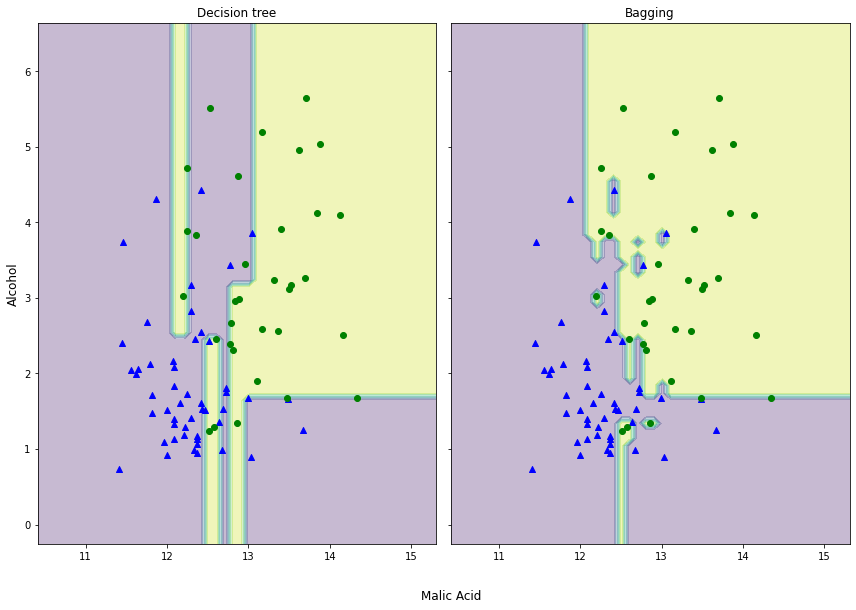

In [6]:
import numpy as np
import matplotlib.pyplot as plt

x_min = X_train[:, 0].min() - 1
x_max = X_train[:, 0].max() + 1
y_min = X_train[:, 1].min() - 1
y_max = X_train[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(nrows=1, ncols=2, 
                        sharex='col', 
                        sharey='row', 
                        figsize=(12, 8))


for idx, clf, tt in zip([0, 1],
                        [tree, bag],
                        ['Decision tree', 'Bagging']):
    clf.fit(X_train, y_train)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx].contourf(xx, yy, Z, alpha=0.3)
    axarr[idx].scatter(X_train[y_train == 0, 0],
                       X_train[y_train == 0, 1],
                       c='blue', marker='^')

    axarr[idx].scatter(X_train[y_train == 1, 0],
                       X_train[y_train == 1, 1],
                       c='green', marker='o')

    axarr[idx].set_title(tt)

axarr[0].set_ylabel('Alcohol', fontsize=12)

plt.tight_layout()
plt.text(0, -0.1,
         s='Malic Acid',
         ha='center',
         va='center',
         fontsize=12,
         transform=axarr[1].transAxes)

#plt.savefig('images/07_08.png', dpi=300, bbox_inches='tight')
plt.show()

Bei unserem einfachen Beispiel gewinnen wir durch Bagging deutlich an Accuracy. Wir sehen auch, daß ein Hinweis für Overfitting vorliegt.<b><br> Decision tree train/test accuracies 0.916/0.778<br>
Bagging train/test accuracies 0.988/0.861